In [1]:
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()
# !pip install graphviz

Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [16]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns
import graphviz

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
import pydotplus
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image  
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()
# !pip install graphv

# import the XGBoost function for classification
# |

In [17]:
df.info()

AttributeError: 'NoneType' object has no attribute 'info'

In [2]:
df1 = pd.read_csv('~/Desktop/New folder (3)/slc/mini/SLC Mini Project/parkinsons.csv')
df1

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,0.021820,0.031300,0.029710,0.065450,0.022110,21.033000,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,0.031340,0.045180,0.043680,0.094030,0.019290,19.085000,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,0.027570,0.038580,0.035900,0.082700,0.013090,20.651000,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,0.029240,0.040050,0.037720,0.087710,0.013530,20.644000,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,0.034900,0.048250,0.044650,0.104700,0.017670,19.649000,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552000,131.162000,113.787000,0.009680,0.000080,0.004630,0.007500,0.013880,0.047010,0.456000,0.023280,0.035260,0.032430,0.069850,0.012220,21.378000,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267000,137.244000,114.820000,0.003330,0.000030,0.001550,0.002020,0.004660,0.016080,0.140000,0.007790,0.009370,0.013510,0.023370,0.006070,24.886000,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332000,113.840000,104.315000,0.002900,0.000030,0.001440,0.001820,0.004310,0.015670,0.134000,0.008290,0.009460,0.012560,0.024870,0.003440,26.892000,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730000,132.068000,91.754000,0.005510,0.000060,0.002930,0.003320,0.008800,0.020930,0.191000,0.010730,0.012770,0.017170,0.032180,0.010700,21.812000,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056000,120.103000,91.226000,0.005320,0.000060,0.002680,0.003320,0.008030,0.028380,0.255000,0.014410,0.017250,0.024440,0.043240,0.010220,21.862000,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [4]:
# df1.name.unique()

In [3]:
df = df1.drop('name', axis = 1, inplace = True)

In [4]:

df1

In [16]:
df1.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [322]:
df.shape

(195, 23)

In [319]:
df.shape

(195, 23)

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [13]:
df

In [14]:
df.describe()

AttributeError: 'NoneType' object has no attribute 'describe'

In [326]:
df.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [327]:
(df['status'] == 1).value_counts()

True     147
False     48
Name: status, dtype: int64

<AxesSubplot:>

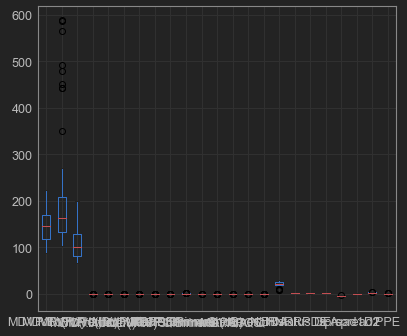

In [328]:
df[df['status'] == 1].boxplot()

In [329]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [330]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [331]:
plt.rcParams['figure.figsize'] = [20,20]

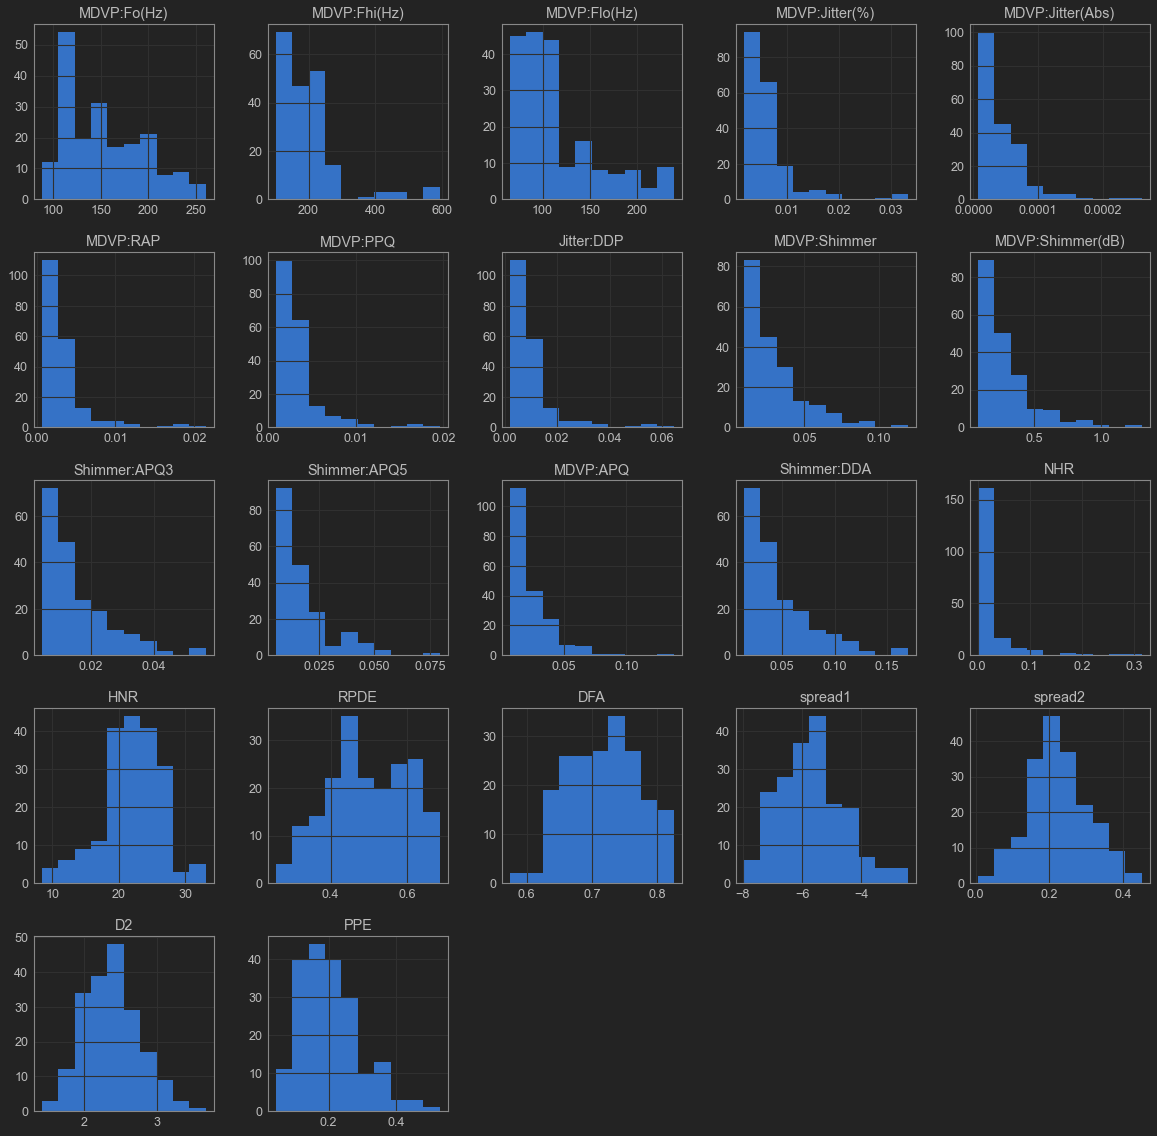

In [332]:
feat = df.drop('status',axis =1).hist()
# feat.plot(kind = 'hist')
# plt.tight_layout()
plt.show()

<AxesSubplot:>

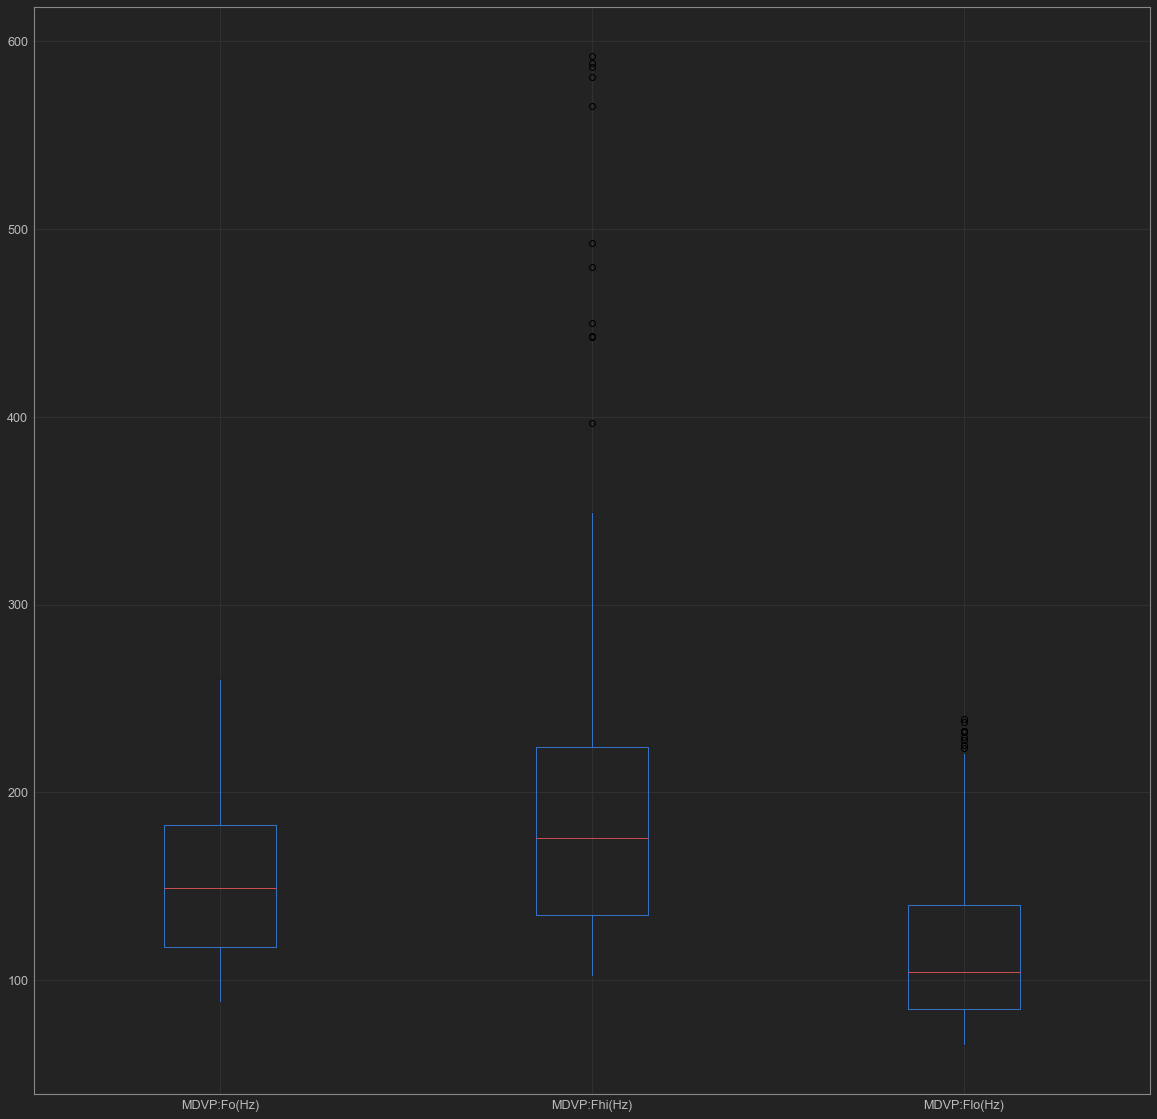

In [333]:
# df_ = df.drop('status',axis =1).boxplot()
df_c = df.drop('status',axis =1)
df_c.iloc[:,0:3].boxplot()

<AxesSubplot:>

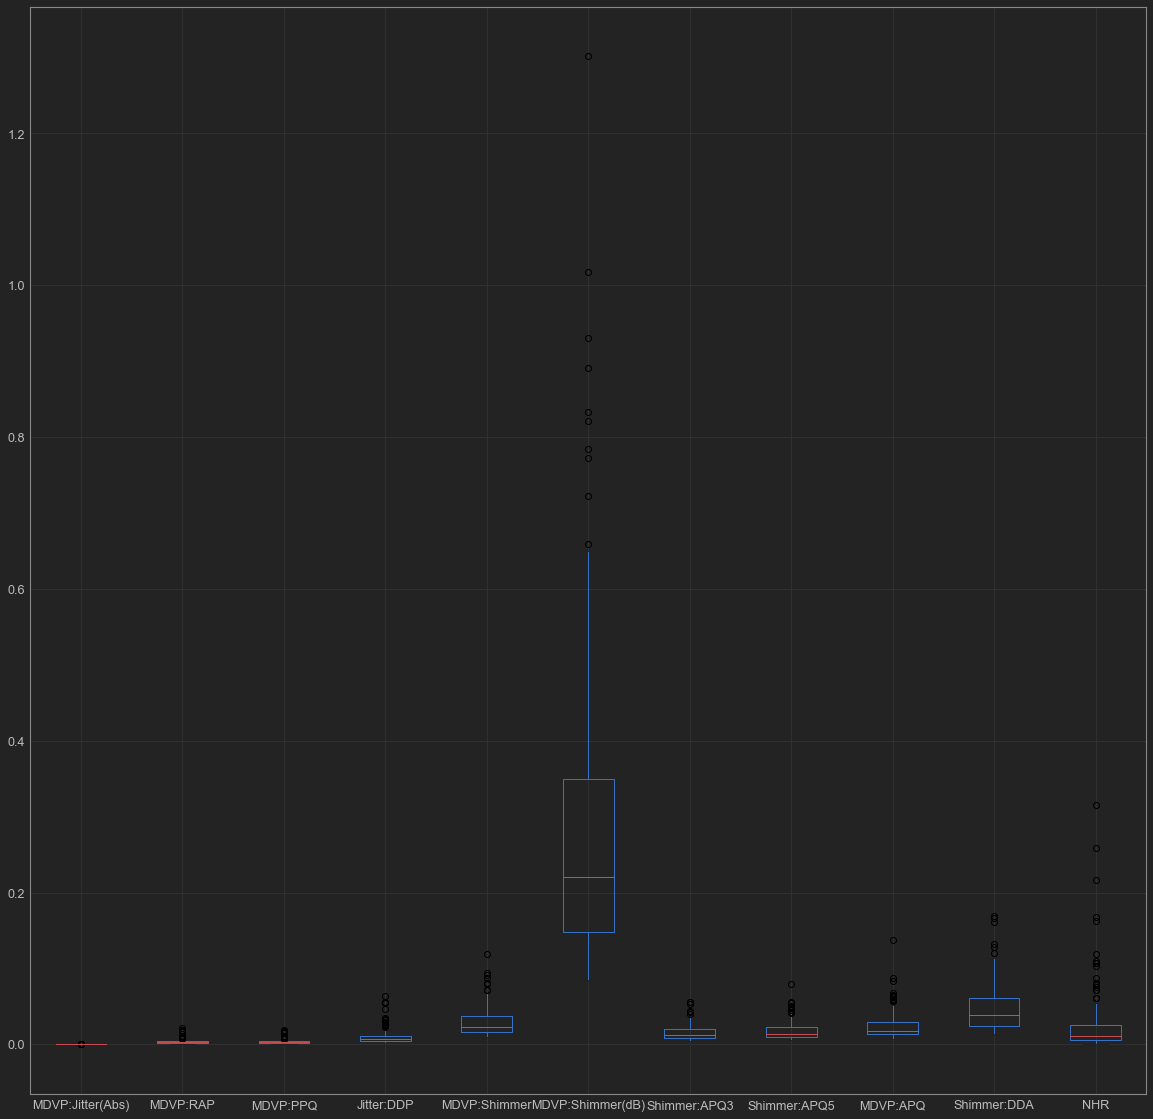

In [334]:
df_c.iloc[:,4:15].boxplot()

In [335]:
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,0.021820,0.031300,0.029710,0.065450,0.022110,21.033000,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,0.031340,0.045180,0.043680,0.094030,0.019290,19.085000,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,0.027570,0.038580,0.035900,0.082700,0.013090,20.651000,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,0.029240,0.040050,0.037720,0.087710,0.013530,20.644000,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,0.034900,0.048250,0.044650,0.104700,0.017670,19.649000,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,120.552000,131.162000,113.787000,0.009680,0.000080,0.004630,0.007500,0.013880,0.047010,0.456000,0.023280,0.035260,0.032430,0.069850,0.012220,21.378000,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,120.267000,137.244000,114.820000,0.003330,0.000030,0.001550,0.002020,0.004660,0.016080,0.140000,0.007790,0.009370,0.013510,0.023370,0.006070,24.886000,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,107.332000,113.840000,104.315000,0.002900,0.000030,0.001440,0.001820,0.004310,0.015670,0.134000,0.008290,0.009460,0.012560,0.024870,0.003440,26.892000,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,95.730000,132.068000,91.754000,0.005510,0.000060,0.002930,0.003320,0.008800,0.020930,0.191000,0.010730,0.012770,0.017170,0.032180,0.010700,21.812000,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,95.056000,120.103000,91.226000,0.005320,0.000060,0.002680,0.003320,0.008030,0.028380,0.255000,0.014410,0.017250,0.024440,0.043240,0.010220,21.862000,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [336]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
# df_compensation = df_compensation[~((df_compensation < (Q1 - 1.5 * IQR)) | (df_compensation > (Q3 + 1.5 * IQR))).any(axis=1)]
df = df[~((df<(q1 - 1.5*iqr))|(df>(q3+1.5*iqr))).any(axis = 1)]
# check the shape of the data
df.shape


(114, 23)

In [337]:
# df.iloc[:,4:15].boxplot()

In [338]:
# df.iloc[:].boxplot()

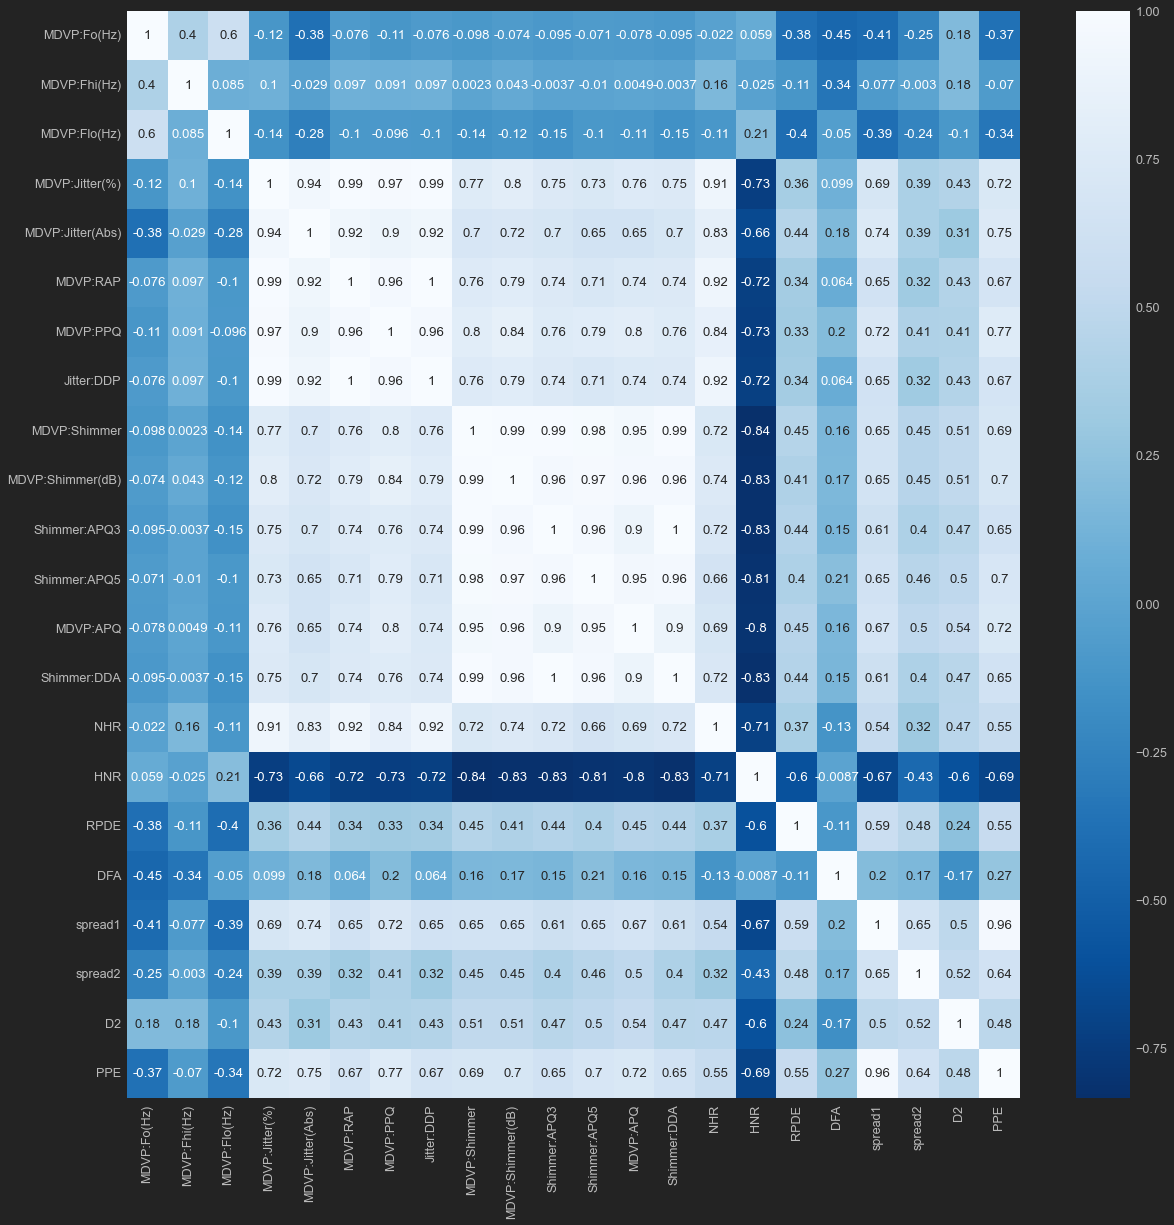

In [339]:
dfplot = sns.heatmap(df_c.corr(),cmap = 'Blues_r',annot=True)


In [340]:
df_c.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [355]:
df.shape

(114, 23)

In [341]:
df_numeric_features_vif = df.select_dtypes(include= np.number)
df_numeric = df_numeric_features_vif.drop('status',axis = 1)
scale = StandardScaler()
dt = scale.fit_transform(df_numeric)
dt = pd.DataFrame(dt,columns = df_numeric.columns)
dt


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.703290,-0.240244,-0.979039,1.210967,1.509410,0.744022,2.191055,0.741604,1.355291,1.508393,1.069920,2.024687,0.789371,1.069417,0.613665,-0.359243,-0.895026,1.695633,1.089030,0.554465,-0.166363,1.248324
1,-0.805728,-0.690575,0.179290,2.235985,2.527592,1.808994,3.404972,1.807202,2.276350,2.298539,2.143840,3.194995,1.617103,2.143323,-0.169373,-0.481634,-0.699170,1.771067,2.027303,1.528855,0.176366,2.631703
2,-0.694795,-0.705106,0.289298,-0.959377,-0.526954,-0.990590,-0.776298,-0.988648,-0.923466,-0.974926,-0.960685,-0.908441,-0.884695,-0.960682,-0.850197,0.853023,0.863638,0.718365,-0.018896,0.427743,-1.636723,0.052352
3,-1.094384,-1.247515,-0.045280,-1.166305,-0.526954,-1.079338,-0.944897,-1.082830,-0.957243,-1.027023,-0.888318,-0.896404,-0.982866,-0.888316,-1.090219,1.484170,1.265132,0.702132,-0.738294,-0.637311,-0.945722,-0.735158
4,-1.452794,-0.825064,-0.445340,0.089703,1.000319,0.122789,0.319600,0.125387,-0.523901,-0.532096,-0.535170,-0.453693,-0.506480,-0.535654,-0.427648,-0.114147,1.052945,0.899312,0.164089,1.437011,-0.097005,0.377439
5,-1.473615,-1.102364,-0.462156,-0.001731,1.000319,-0.078910,0.319600,-0.081813,0.089864,0.023611,-0.002552,0.145505,0.244783,-0.002078,-0.471454,-0.098415,0.388181,1.374377,0.820783,1.411479,0.266031,1.030254
6,-1.681302,-1.284596,-0.690006,-0.131663,1.000319,-0.191862,0.302740,-0.189449,-0.482708,-0.479998,-0.526486,-0.366755,-0.325640,-0.526488,-0.340035,-0.332500,1.010118,0.948373,0.499867,2.347580,0.182156,0.675521
7,-1.570987,-1.200445,-0.619301,0.036768,1.000319,0.025973,0.353320,0.028514,0.019013,-0.028486,-0.027157,0.033156,0.007107,-0.027165,-0.362851,-0.239369,0.740900,1.260882,0.890452,1.952495,0.956295,1.105214
8,-0.180163,-0.180821,0.813411,-1.151868,-1.036045,-1.289105,-1.189367,-1.287338,-1.210988,-1.218048,-1.138707,-1.202690,-1.102737,-1.138701,-0.873925,1.110076,-0.450482,-1.521103,-1.250302,-1.082393,-1.022806,-1.149297
9,-0.110749,0.265848,-0.929386,-0.685076,-0.526954,-0.909911,-0.725718,-0.907921,-0.895455,-0.853365,-1.034499,-0.915128,-0.423810,-1.034495,-0.454114,0.853967,-0.745771,-1.158502,-0.053828,0.388963,0.551211,-0.142340


In [342]:
df_n = df_n.drop(['spread1'],axis = 1)

KeyError: "['spread1'] not found in axis"

In [354]:
vif = pd.DataFrame()
vif["VIF_F"] = [variance_inflation_factor(df_n.values, i) for i in range(df_n.shape[1])]
vif["Feat"] = df_n.columns
vif.sort_values('VIF_F',ascending=False)

# df_feat = vif[vif['VIF_F']>10]
# df_feat

,VIF_F,Feat
0,149.930115,MDVP:Fo(Hz)
5,115.982747,Shimmer:APQ5
12,109.454075,D2
3,84.475781,MDVP:Jitter(Abs)
7,73.683381,Shimmer:DDA
9,66.676961,HNR
4,60.550439,MDVP:RAP
6,54.682052,MDVP:APQ
13,52.184461,PPE
1,48.754371,MDVP:Fhi(Hz)


In [343]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(dt.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(dt.values, i) for i in range(dt.shape[1])]

    # create a column of variable names
    vif["Features"] = dt.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
#     #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        dt = dt.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)


    VIF_Factor      Features
0     4.900309   MDVP:Fo(Hz)
1     2.828240  MDVP:Fhi(Hz)
2     1.623454  MDVP:Flo(Hz)
3     3.037283    Jitter:DDP
4     5.933670      MDVP:APQ
5     6.192479   Shimmer:DDA
6     4.440630           NHR
7     5.224842           HNR
8     4.340965          RPDE
9     2.883844           DFA
10    2.577752       spread1
11    1.781513       spread2
12    2.134049            D2


In [344]:
import statsmodels.api as sm

In [345]:
df_f = dt[['MDVP:Flo(Hz)','Jitter:DDP','Shimmer:DDA','NHR','spread2','MDVP:Fo(Hz)','MDVP:Fhi(Hz)','HNR','RPDE','DFA','spread1','D2']]
df_f.shape
df_c = sm.add_constant(df_f)
df_c

,const,MDVP:Flo(Hz),Jitter:DDP,Shimmer:DDA,NHR,spread2,MDVP:Fo(Hz),MDVP:Fhi(Hz),HNR,RPDE,DFA,spread1,D2
0,1.000000,-0.979039,0.741604,1.069417,0.613665,0.554465,-0.703290,-0.240244,-0.359243,-0.895026,1.695633,1.089030,-0.166363
1,1.000000,0.179290,1.807202,2.143323,-0.169373,1.528855,-0.805728,-0.690575,-0.481634,-0.699170,1.771067,2.027303,0.176366
2,1.000000,0.289298,-0.988648,-0.960682,-0.850197,0.427743,-0.694795,-0.705106,0.853023,0.863638,0.718365,-0.018896,-1.636723
3,1.000000,-0.045280,-1.082830,-0.888316,-1.090219,-0.637311,-1.094384,-1.247515,1.484170,1.265132,0.702132,-0.738294,-0.945722
4,1.000000,-0.445340,0.125387,-0.535654,-0.427648,1.437011,-1.452794,-0.825064,-0.114147,1.052945,0.899312,0.164089,-0.097005
5,1.000000,-0.462156,-0.081813,-0.002078,-0.471454,1.411479,-1.473615,-1.102364,-0.098415,0.388181,1.374377,0.820783,0.266031
6,1.000000,-0.690006,-0.189449,-0.526488,-0.340035,2.347580,-1.681302,-1.284596,-0.332500,1.010118,0.948373,0.499867,0.182156
7,1.000000,-0.619301,0.028514,-0.027165,-0.362851,1.952495,-1.570987,-1.200445,-0.239369,0.740900,1.260882,0.890452,0.956295
8,1.000000,0.813411,-1.287338,-1.138701,-0.873925,-1.082393,-0.180163,-0.180821,1.110076,-0.450482,-1.521103,-1.250302,-1.022806
9,1.000000,-0.929386,-0.907921,-1.034495,-0.454114,0.388963,-0.110749,0.265848,0.853967,-0.745771,-1.158502,-0.053828,0.551211


In [346]:
df['status'] = df['status'].astype(int)
df_ = df['status']
df_

0      1
3      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
36     1
37     1
38     1
39     1
40     1
41     1
54     1
55     1
56     1
57     1
58     1
59     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
92     1
93     1
94     1
95     1
96     1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
111    1
112    1
113    1
114    1
119    1
121    1
122    1
123    1
124    1
125    1
126    1
127    1
128    1
129    1
130    1
131    1
132    1
133    1
134    1
135    1
136    1
137    1
138    1
139    1
140    1
142    1
143    1
144    1
145    1
153    1
154    1
155    1
156    1
158    1
159    1
160    1
161    1
162    1
163    1
177    1
178    1
179    1
1

In [347]:
x_train,x_test,y_train,y_test = train_test_split(df_c,df_,random_state=10,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(91, 13)
(23, 13)
(91,)
(23,)


In [348]:
y_train.unique()

array([1])

In [349]:
decs = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
dftree = decs.fit(x_train, y_train)

In [350]:
from graphviz import Digraph
# sudo apt-get install graphviz
import os
x_train

,const,MDVP:Flo(Hz),Jitter:DDP,Shimmer:DDA,NHR,spread2,MDVP:Fo(Hz),MDVP:Fhi(Hz),HNR,RPDE,DFA,spread1,D2
19,1.000000,-0.884415,0.308368,0.419090,1.230604,0.127801,-1.184959,0.888423,-0.034231,0.152495,0.218702,0.065389,1.627495
14,1.000000,-1.272531,1.215203,0.324050,2.128633,0.498045,0.342592,-0.044732,-1.459502,1.485429,-0.427952,2.057060,1.276382
38,1.000000,-1.271671,2.980437,2.473311,3.051304,-1.096779,0.023941,-0.126381,-0.577911,0.060233,0.094493,-0.336489,-0.768607
80,1.000000,-0.835240,0.728150,0.150855,0.234923,-1.616872,0.745425,0.725357,-1.209686,0.758161,0.199911,-0.276468,-1.171373
96,1.000000,1.861000,-1.432647,0.047131,-0.446813,-0.106001,1.846913,1.707644,-0.470307,-0.092650,-1.835005,-0.691160,0.739314
112,1.000000,1.154900,-0.614612,-0.713674,-0.820992,-0.169549,0.176208,-0.152732,0.217472,-0.955037,0.808753,-0.112963,1.077138
3,1.000000,-0.045280,-1.082830,-0.888316,-1.090219,-0.637311,-1.094384,-1.247515,1.484170,1.265132,0.702132,-0.738294,-0.945722
74,1.000000,-0.693542,-0.552721,-1.314791,-0.344599,0.772426,1.052369,1.103750,1.570378,-1.037606,-1.342810,1.226660,0.999972
97,1.000000,-0.576432,-0.881012,-0.092294,-0.041605,1.688568,2.489994,2.229612,-0.569101,0.580409,-2.906881,0.220567,1.608359
103,1.000000,0.204993,0.346041,-0.120275,1.026174,0.089539,-0.458069,-0.670157,-0.794061,1.435170,-0.966917,0.164388,-0.819572


In [351]:
y_train


25     1
20     1
68     1
127    1
144    1
181    1
7      1
121    1
145    1
159    1
113    1
133    1
105    1
76     1
96     1
179    1
129    1
110    1
122    1
72     1
27     1
10     1
79     1
84     1
132    1
112    1
158    1
58     1
103    1
81     1
137    1
95     1
128    1
8      1
9      1
75     1
36     1
56     1
94     1
26     1
143    1
142    1
11     1
77     1
23     1
160    1
123    1
180    1
182    1
178    1
154    1
29     1
28     1
24     1
39     1
156    1
93     1
55     1
107    1
16     1
131    1
54     1
134    1
37     1
19     1
111    1
124    1
153    1
82     1
80     1
125    1
114    1
57     1
104    1
135    1
85     1
15     1
22     1
66     1
70     1
0      1
119    1
12     1
41     1
140    1
136    1
40     1
106    1
21     1
155    1
13     1
Name: status, dtype: int32

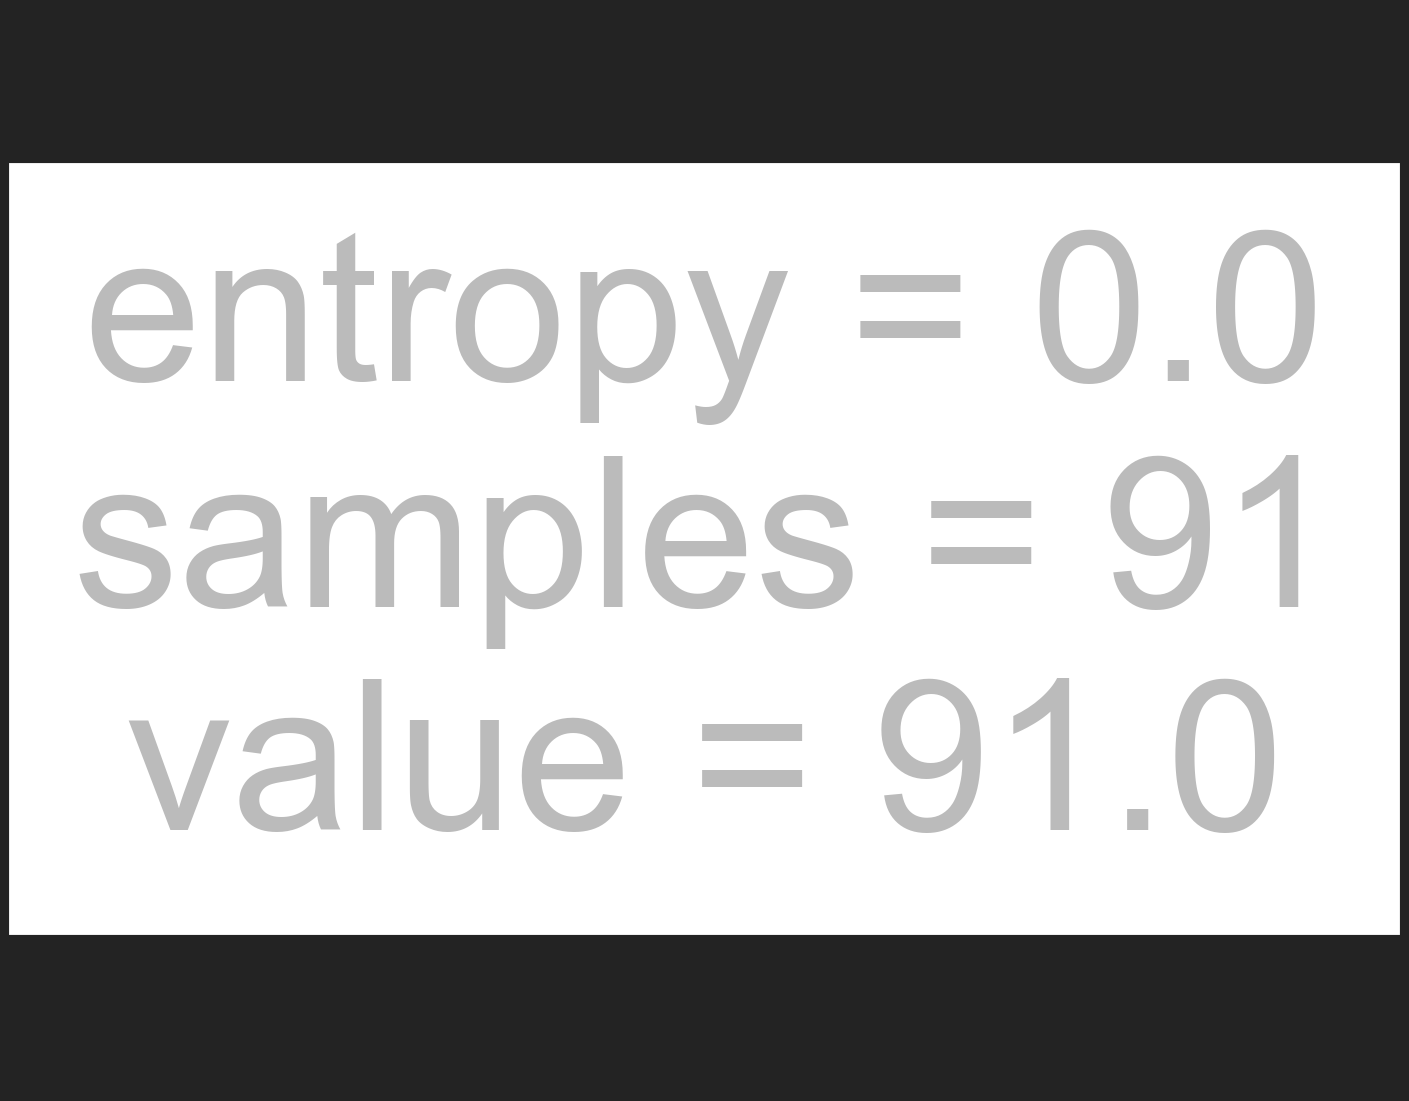

In [352]:
# type your code here
decision_tree_classification = DecisionTreeClassifier(criterion='entropy')

# fit the model using fit() on train data
dt_model = decision_tree_classification.fit(x_train, y_train)

# plot a decision tree
# save the column names in 'labels'
labels = x_train.columns

# export a decision tree in DOT format
# pass the 'decision_tree' to export it to Graphviz
# pass the column names to 'feature_names'
# pass the required class labels to 'class_names'
dot_data = tree.export_graphviz(dt_model, feature_names = labels, class_names = ["0","1"])  

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
# Image(graph.create_png())
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_classification , 
                   feature_names=x_train.columns,  
                   class_names=True,
                   filled=True)

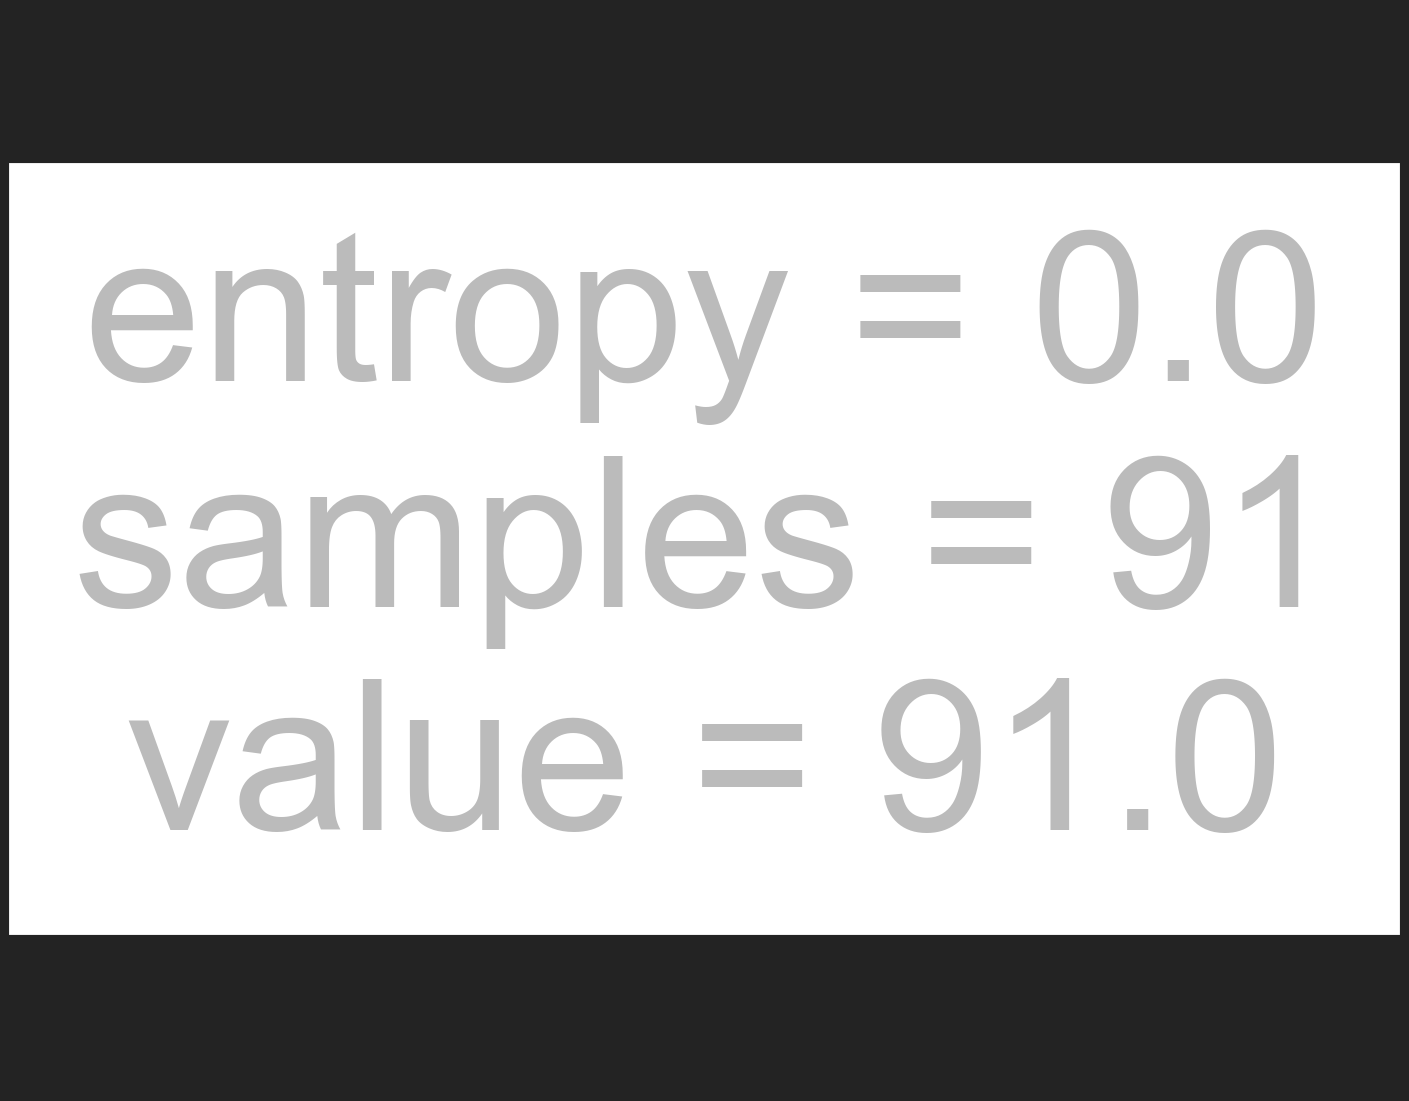

In [353]:
labels = x_train.columns

# export a decision tree in DOT format
# pass the 'decision_tree' to export it to Graphviz
# pass the column names to 'feature_names'
# pass the required class labels to 'class_names'
dot_data = tree.export_graphviz(dftree, feature_names = labels, class_names = ["0","1"])  

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decs, 
                   feature_names=x_train.columns,  
                   class_names=True,
                   filled=True)